In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [5]:
!pip install kaggle

In [7]:
kaggle_credentails = json.load(open("kaggle.json"))

In [9]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [11]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:01<50:14, 726kB/s]
  0%|          | 2.00M/2.04G [00:01<25:17, 1.44MB/s]
  0%|          | 3.00M/2.04G [00:01<17:11, 2.12MB/s]
  0%|          | 4.00M/2.04G [00:02<12:59, 2.80MB/s]
  0%|          | 5.00M/2.04G [00:02<10:44, 3.39MB/s]
  0%|          | 6.00M/2.04G [00:02<09:46, 3.72MB/s]
  0%|          | 7.00M/2.04G [00:02<08:56, 4.06MB/s]
  0%|          | 8.00M/2.04G [00:02<07:44, 4.69MB/s]
  0%|          | 9.00M/2.04G [00:03<07:16, 4.99MB/s]
  0%|          | 10.0M/2.04G [00:03<07:04, 5.13MB/s]
  1%|          | 11.0M/2.04G [00:03<06:07, 5.92MB/s]
  1%|          | 12.0M/2.04G [00:03<06:21, 5.70MB/s]
  1%|          | 13.0M/2.04G [00:03<06:43, 5.40MB/s]
  1%|          | 14.0M/2.04G [00:03<06:24, 5.66MB/s]
  1%|          | 15.0M/2.04G [00:04<06:03, 5.98MB/s]
  1%|          | 16.0M/2.04G [00:04<05:46, 6.28MB/s]
  1%|          | 17.0M/2.04G [00:04<05:56, 6.09MB/s]
  1%|          | 18.0M/2.04G [00:04<05:52, 6.16MB/s]
  

In [15]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [16]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [19]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


In [21]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

[[[160 148 152]
  [161 149 153]
  [161 149 153]
  ...
  [145 129 130]
  [142 126 127]
  [140 124 125]]

 [[160 148 152]
  [160 148 152]
  [160 148 152]
  ...
  [141 125 126]
  [139 123 124]
  [138 122 123]]

 [[162 150 154]
  [161 149 153]
  [160 148 152]
  ...
  [141 125 126]
  [142 126 127]
  [142 126 127]]

 ...

 [[151 144 151]
  [150 143 150]
  [148 141 148]
  ...
  [ 94  84  83]
  [ 92  82  81]
  [ 92  82  81]]

 [[148 141 148]
  [147 140 147]
  [147 140 147]
  ...
  [ 93  83  82]
  [ 92  82  81]
  [ 91  81  80]]

 [[144 137 144]
  [144 137 144]
  [145 138 145]
  ...
  [ 93  83  82]
  [ 92  82  81]
  [ 91  81  80]]]


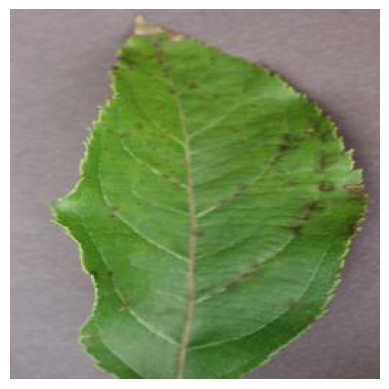

In [29]:
image_path = r"C:\Users\JAI BHORTAKE\Desktop\DL project\plantvillage dataset\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG"

# Read the image
img = mpimg.imread(image_path)

# Print image data (optional)
# This might not be human-readable depending on the data type
print(img)

# Display the image
plt.imshow(img)

plt.axis('off')
plt.show()


In [15]:
# Image Parameters
img_size = 224
batch_size = 64

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

# Assistant
The error is occurring because the `ImageDataGenerator` class has not been imported. To fix this error, you need to import the `ImageDataGenerator` class from the appropriate library, such as Keras or TensorFlow.

Before providing the corrected code, would you like me to import the `ImageDataGenerator` class from the appropriate library?

In [31]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [33]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [55]:
# Advanced Image Data Generators with Enhanced Data Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,  # Increased validation split to 30% to ensure robust validation
    rotation_range=40,  # Increased rotation range for more variation
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    shear_range=0.3,  # Increased shear range for more variation
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,  # Flip images horizontally for more variety
    vertical_flip=True,  # Added vertical flip for more data diversity
    fill_mode='nearest'
)

# Update data generators
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 38029 images belonging to 38 classes.
Found 16276 images belonging to 38 classes.


In [57]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Model Definition
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Convolutional Layer 4
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Convolutional Layer 5
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Global Average Pooling
model.add(layers.GlobalAveragePooling2D())

# Dense Layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Compile the Model with Adam Optimizer and Learning Rate Scheduler
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,854,694 (7.08 MB)

 Trainable params: 1,852,710 (7.07 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [63]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,  # Increased epochs for more training
    callbacks=[early_stopping, checkpoint, lr_scheduler, tensorboard]
)

# Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 7979s 13s/step - accuracy: 0.8830 - loss: 0.3671 - val_accuracy: 0.7245 - val_loss: 1.2438 - learning_rate: 0.0010
Epoch 2/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8125 - loss: 0.5170 - val_accuracy: 0.7500 - val_loss: 1.4496 - learning_rate: 0.0010
Epoch 3/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 7886s 13s/step - accuracy: 0.9020 - loss: 0.3109 - val_accuracy: 0.9014 - val_loss: 0.3156 - learning_rate: 0.0010
Epoch 4/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9062 - loss: 0.2974 - val_accuracy: 0.9000 - val_loss: 0.3373 - learning_rate: 0.0010
Epoch 5/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 7260s 12s/step - accuracy: 0.9232 - loss: 0.2409 - val_accuracy: 0.8022 - val_loss: 0.7024 - learning_rate: 0.0010
Epoch 6/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9531 - loss: 0.1559 - val_accuracy: 0.8500 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 7/20
594/594 ━━━━━━━━━━━━━━━━━━━━ 6819s 11s/step - accuracy: 0.9433 - 

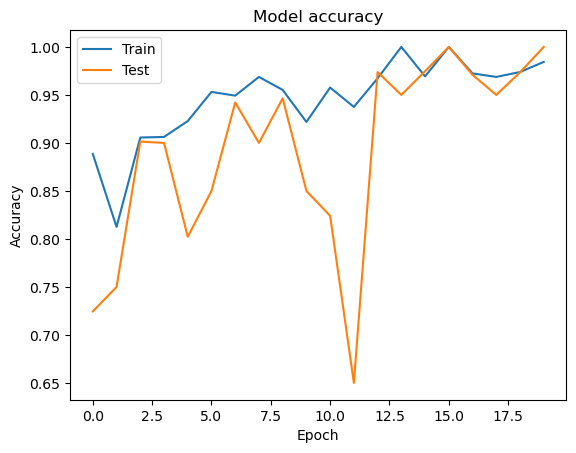

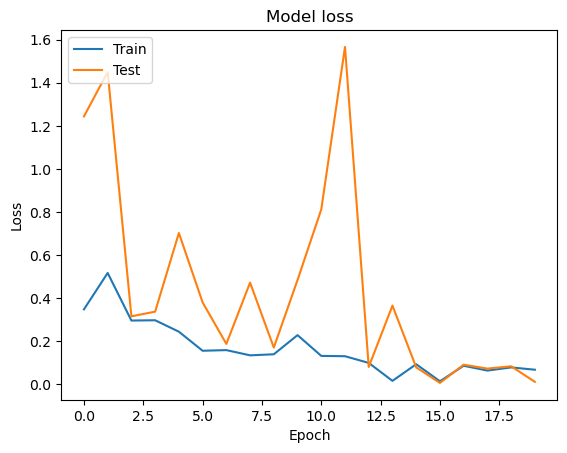

In [65]:
import matplotlib.pyplot as plt  # Import the pyplot module

# Rest of the code remains the same
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Image Parameters
img_size = 224
batch_size = 32

# Dataset Path
base_dir = 'plantvillage dataset/color'

# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,  # Use 20% of data for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Compile the Model with Adam Optimizer and Learning Rate Scheduler
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()




Found 38029 images belonging to 38 classes.
Found 16276 images belonging to 38 classes.


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,579,750 (105.21 MB)

 Trainable params: 12,865,062 (49.08 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [37]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,
    callbacks=[early_stopping, checkpoint, lr_scheduler]
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10


E:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7447s 6s/step - accuracy: 0.3595 - loss: 2.4935 - val_accuracy: 0.7106 - val_loss: 1.0153 - learning_rate: 0.0010
Epoch 2/10
   1/1188 ━━━━━━━━━━━━━━━━━━━━ 1:15:08 4s/step - accuracy: 0.5938 - loss: 1.3553

E:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5938 - loss: 1.3553 - val_accuracy: 0.7500 - val_loss: 0.9229 - learning_rate: 0.0010
Epoch 3/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7131s 6s/step - accuracy: 0.5525 - loss: 1.4264 - val_accuracy: 0.7610 - val_loss: 0.7760 - learning_rate: 0.0010
Epoch 4/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5938 - loss: 1.2144 - val_accuracy: 0.8000 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 5/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7067s 6s/step - accuracy: 0.5744 - loss: 1.3392 - val_accuracy: 0.7768 - val_loss: 0.7239 - learning_rate: 0.0010
Epoch 6/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5938 - loss: 1.0023 - val_accuracy: 0.7000 - val_loss: 0.7242 - learning_rate: 0.0010
Epoch 7/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7301s 6s/step - accuracy: 0.6005 - loss: 1.2516 - val_accuracy: 0.8063 - val_loss: 0.6109 - learning_rate: 0.0010
Epoch 8/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6250 - loss: 

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Image Parameters
img_size = 224
batch_size = 32

# Dataset Path
base_dir = 'plantvillage dataset/color'

# Data Generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Setting validation split
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('resnet50_best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Summary of the model
model.summary()


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


AttributeError: 'LinearRegression' object has no attribute 'compile'

In [24]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,
    callbacks=[early_stopping, checkpoint, lr_scheduler]
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10


E:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2642s 2s/step - accuracy: 0.1195 - loss: 3.3360 - val_accuracy: 0.2085 - val_loss: 2.9971 - learning_rate: 0.0010
Epoch 2/10


E:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.3374 - learning_rate: 0.0010
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3052s 2s/step - accuracy: 0.1919 - loss: 3.0206 - val_accuracy: 0.2680 - val_loss: 2.8095 - learning_rate: 0.0010
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 4.3835 - learning_rate: 0.0010
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3029s 2s/step - accuracy: 0.2313 - loss: 2.8610 - val_accuracy: 0.2829 - val_loss: 2.6405 - learning_rate: 0.0010
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 3.6008 - learning_rate: 5.0000e-04
Epoch 7/10
 454/1358 ━━━━━━━━━━━━━━━━━━━━ 28:11 2s/step - accuracy: 0.2422 - loss: 2.7950

KeyboardInterrupt: 

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Image Parameters
img_size = 224
batch_size = 64

# Dataset Path
base_dir = 'plantvillage dataset/color'

# Image Data Generators with Data Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,  # Use 20% of data for validation
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# EfficientNetV2 Model Definition
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Unfreeze some layers of EfficientNetV2
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Add custom layers on top of EfficientNetV2
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
checkpoint = ModelCheckpoint('efficientnetv2_finetuned_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
# Summary of the model
model.summary()




Found 38029 images belonging to 38 classes.
Found 16276 images belonging to 38 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 6,594,678 (25.16 MB)

 Trainable params: 6,534,070 (24.93 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [32]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  # Increased the number of epochs
    callbacks=[early_stopping, checkpoint, lr_scheduler]
)

# Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10


E:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 12/679 ━━━━━━━━━━━━━━━━━━━━ 59:41 5s/step - accuracy: 0.0465 - loss: 3.6524

KeyboardInterrupt: 

In [30]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Image Parameters
img_size = 224
batch_size = 64

# Dataset Path
base_dir = 'plantvillage dataset/color'

# Image Data Generators with Data Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% of data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# EfficientNetV2 Model Definition
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of EfficientNetV2
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('efficientnetv2_best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

model.summary()

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


AttributeError: module 'tensorflow.keras.applications' has no attribute 'ViT'